# Utrecht Multi-Person Motion Benchmark

Dataset: http://www.projects.science.uu.nl/umpm/data/data.shtml

UMPM
elapsed 2.1774346828460693


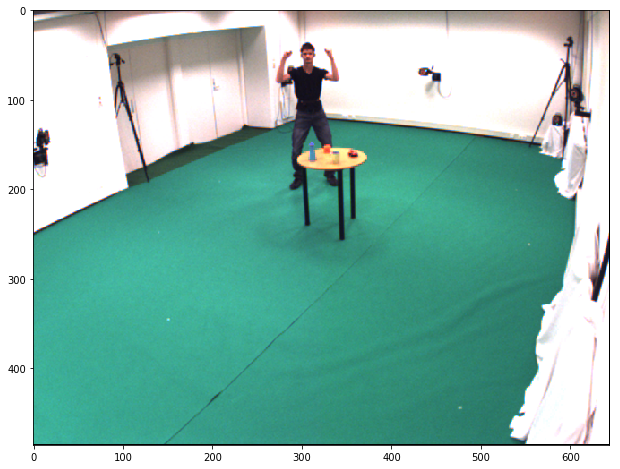

In [1]:
import json; from pprint import pprint
Settings = json.load(open('settings.txt'))

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0,'../')
from pak import utils
from pak.datasets.UMPM import UMPM
import matplotlib.pyplot as plt
import itertools
from pak.util import download
from time import time

root = Settings['data_root']

user = Settings['UMPM']['username']
pwd = Settings['UMPM']['password']

mpm = UMPM(root, user, pwd)


_start = time()
X, Y, Calib = mpm.get_data('p1_grab_3')
_end = time()
print('elapsed', _end - _start)

fig = plt.figure(figsize=(16,8))
Xl = X['l']
Im = Xl[0]
plt.imshow(Im)
plt.show()

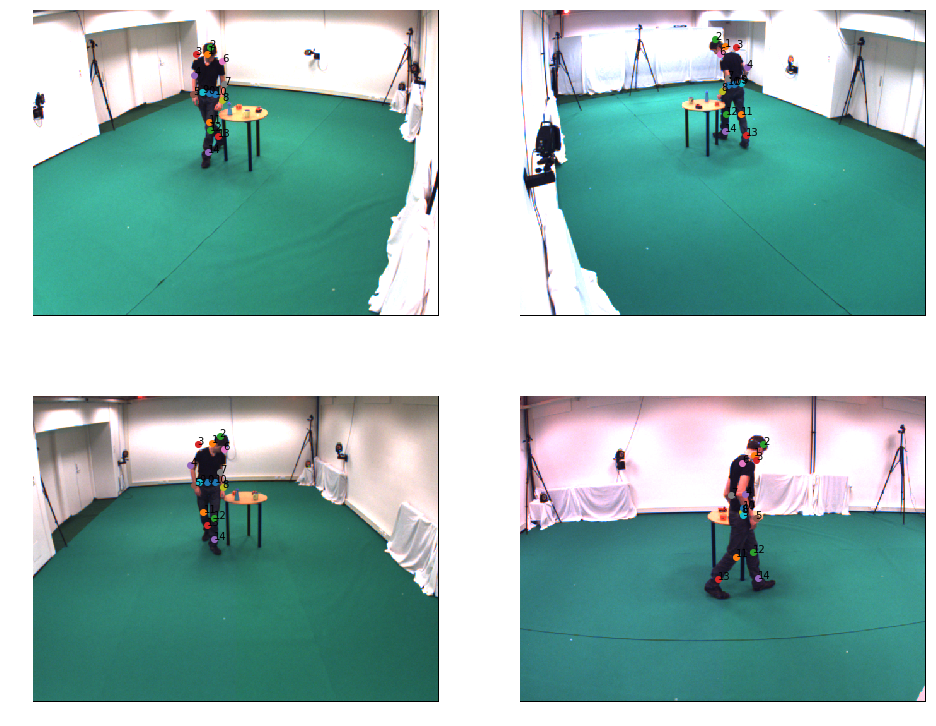

In [7]:
import cv2

fig = plt.figure(figsize=(16,13))

def handle_img(ax, cam, frame=0):
    

    calib = Calib[cam]
    y = Y[frame]
    rvec = np.array(calib['rvec'])
    tvec = np.array(calib['tvec'])
    K = calib['K']
    points = []
    for x,y,z,t1,t2 in y:
        points.append((x,y,z))

    points = np.array(points)

    res = np.squeeze(cv2.projectPoints(points, 
                            rvec.astype('float32'), 
                            tvec.astype('float32'), 
                            K.astype('float32'), 0)[0])


    for i,(px,py) in enumerate(res):
        ax.scatter(px, py)
        ax.text(px, py, str(i))   

    Im = X[cam][frame]
    ax.axis('off')
    ax.imshow(Im)

frame = 2000
handle_img(fig.add_subplot(221), 'l', frame=frame)
handle_img(fig.add_subplot(222), 'r', frame=frame)
handle_img(fig.add_subplot(223), 's', frame=frame)
handle_img(fig.add_subplot(224), 'f', frame=frame)

# head = 2
# neck = 1
# rshoulder = 3
# lshoulder = 6
# relbow = 4
# lelbow = 7
# rhand = 5
# lhand = 8
# lwaist = 10
# rwaist = 5
# pelvis = 0
# lknee = 12
# rknee = 11
# rfoot = 13
# lfoot = 14

plt.show()